# Data Cleaning
In this notebook we present our research about our data.  
There are two types of cells:
1. A cell that presents research and insights about the data information.
2. A cell that changes the `df` according to the specific insight.

First of all, import these packages and load the csv that we created in crawling chapter.

In [1]:
import re
import pandas as pd

# language detector
from langdetect import detect
from langdetect import detect_langs

# Wordcloud visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Handle warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../crawling/merged_csv.csv")

### Remove Unnecessary Columns

In [3]:
print(df.shape)
df.head()

(16103, 5)


Unnamed: 0  Unnamed: 0.1  category  \
0           0             0  business   
1           1             1  business   
2           2             2  business   
3           3             3  business   
4           4             4  business   

                                              header  \
0  Why CEOs and Company Executives Are Focused on...   
1                 What did I do differently in 2021?   
2           Transition from QA Engineer to Developer   
3  The President of Indonesia Got Annoyed Because...   
4  Magento Problems Owners of Online Shop Face in...   

                                             content  
0  CEOs and company executives are having trouble...  
1  I love what I do, so I will take any amount of...  
2  My personal experience of changing position fr...  
3  The president of Indonesia got angry. As the l...  
4  Just imagine you have an online shop and in 20...

In the `df` above we have two unnecessary columns:
* Unnamed: 0
* Unnamed: 0.1
Let's drop these two columns.

In [4]:
# Romove df columns
df.drop(columns="Unnamed: 0", axis=1, inplace=True)
df.drop(columns="Unnamed: 0.1", axis=1, inplace=True)

In [5]:
df

category                                             header  \
0      business  Why CEOs and Company Executives Are Focused on...   
1      business                 What did I do differently in 2021?   
2      business           Transition from QA Engineer to Developer   
3      business  The President of Indonesia Got Annoyed Because...   
4      business  Magento Problems Owners of Online Shop Face in...   
...         ...                                                ...   
16098   weather  Climate Warming Raises the Danger of Aflatoxin...   
16099   weather  To the showers! 6 MLB rainouts, most in a day ...   
16100   weather  Sandstorm suspends flights, many Iraqis strugg...   
16101   weather  Coalition climate target consistent with more ...   
16102   weather  Iraq dust storm leaves 5,000 people needing tr...   

                                                 content  
0      CEOs and company executives are having trouble...  
1      I love what I do, so I will take any amount of...  
2      My personal experience of changing position fr...  
3      The president of Indonesia got angry. As the l...  
4      Just imagine you have an online shop and in 20...  
...                                                  ...  
16098  Scientists at the Michigan State University ar...  
16099  All-Star aces Max Scherzer, Shane Bieber and G...  
16100  BAGHDAD (AP) — Hundreds of Iraqis rushed to ho...  
16101  The Morrison government’s climate change commi...  
16102  One person has died and more than 5,000 people...  

[16103 rows x 3 columns]

### Remove null Objects

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16103 entries, 0 to 16102
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  16103 non-null  object
 1   header    16103 non-null  object
 2   content   13416 non-null  object
dtypes: object(3)
memory usage: 377.5+ KB


In [7]:
df[df['content'].isna()]

category                                             header content
11     business  More Than 70% of People Have Imposter Syndrome...     NaN
13     business  4 investments that may be profitable in the fu...     NaN
21     business                    How To Flip a Coin Successfully     NaN
24     business   Ecommerce Website Design Tips and Best Practices     NaN
34     business  What to Consider When Starting a Road Contract...     NaN
...         ...                                                ...     ...
12681   weather              The Full Explanation is Not Available     NaN
12682   weather                             Rainy Days and Mondays     NaN
12683   weather             How Can You Turn $100 into $400,000???     NaN
12684   weather             Four Tornados With a Side of Lightning     NaN
12685   weather                                The Weather Outside     NaN

[2687 rows x 3 columns]

The two cell above showed us that we have `null` objects in content column.  
As a result we need to drop these `null` objects.

In [8]:
# Remove null objects
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13416 entries, 0 to 16102
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  13416 non-null  object
 1   header    13416 non-null  object
 2   content   13416 non-null  object
dtypes: object(3)
memory usage: 419.2+ KB


### Remove Duplicate Rows

In [9]:
df[df.duplicated() == True]

category                                             header  \
555    business  Why CEOs and Company Executives Are Focused on...   
556    business                 What did I do differently in 2021?   
557    business           Transition from QA Engineer to Developer   
558    business  The President of Indonesia Got Annoyed Because...   
559    business  Magento Problems Owners of Online Shop Face in...   
...         ...                                                ...   
16030   weather  New Mexico wildfire: Huge blaze could worsen t...   
16080   weather  To the showers! 6 MLB rainouts, most in a day ...   
16082   weather  To the showers! 6 MLB rainouts, most in a day ...   
16093   weather                    Strong earthquake shakes Taiwan   
16097   weather           Dust storm and wildfires seen from space   

                                                 content  
555    CEOs and company executives are having trouble...  
556    I love what I do, so I will take any amount of...  
557    My personal experience of changing position fr...  
558    The president of Indonesia got angry. As the l...  
559    Just imagine you have an online shop and in 20...  
...                                                  ...  
16030  "Historic" and "extreme" weather conditions co...  
16080  All-Star aces Max Scherzer, Shane Bieber and G...  
16082  All-Star aces Max Scherzer, Shane Bieber and G...  
16093  TAIPEI, Taiwan (AP) — A magnitude 6.1 earthqua...  
16097  Massive plumes of smoke from wildfires in New ...  

[5581 rows x 3 columns]

The cell above showed us that we have duplicate rows in our dataframe.  
As a result we need to prune these rows.

In [10]:
# Prune duplicate rows
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7835 entries, 0 to 16102
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  7835 non-null   object
 1   header    7835 non-null   object
 2   content   7835 non-null   object
dtypes: object(3)
memory usage: 244.8+ KB


### WordCloud Visualization

In [11]:
def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    print(f"Number of words: {len(words.split())}")
    cleaned_word = ' '.join([word for word in words.split()])        
    wordcloud = WordCloud(background_color = color,
                          width = 2500, 
                          height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


business:
Number of words: 68174


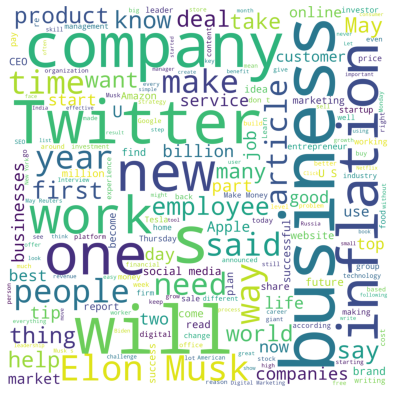

science:
Number of words: 50906


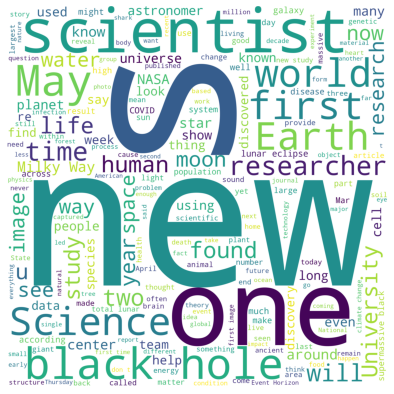

sports:
Number of words: 68295


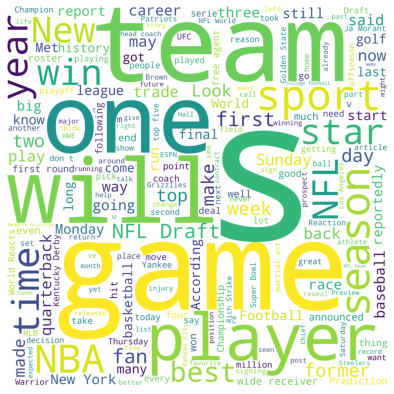

entertainment:
Number of words: 64384


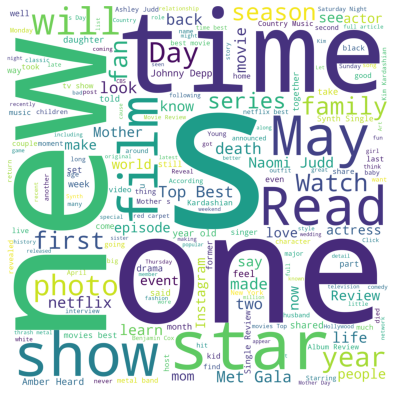

technology:
Number of words: 76864


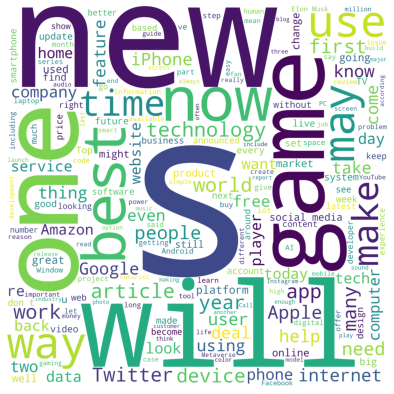

food:
Number of words: 31485


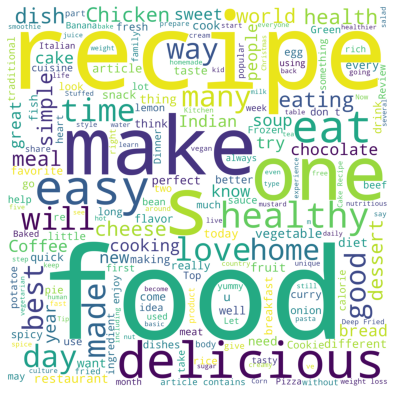

politics:
Number of words: 72089


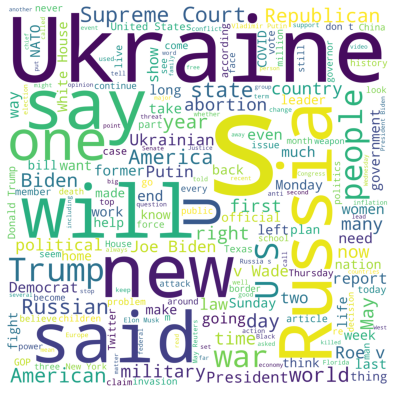

weather:
Number of words: 15386


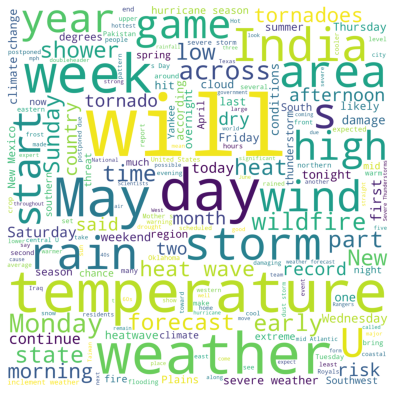

In [12]:
## Vizualization word cloud
category_series_words = {}

for category in set(df["category"]):
    category_words = df[df["category"] == category]["header"] + " " + df[df["category"] == category]["content"]        
    category_series_words[category] = category_words        

for category, series_words in category_series_words.items():
    print(f"{category}:")
    wordcloud_draw(series_words, 'white')
    

### Remove Article with Short Content

In [13]:
#drop < 5 words
df = df[df["content"].str.split().str.len().gt(5)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7719 entries, 0 to 16102
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  7719 non-null   object
 1   header    7719 non-null   object
 2   content   7719 non-null   object
dtypes: object(3)
memory usage: 241.2+ KB


### Remove Number \n and \r from Content and Header Columns
Add Benford Rule ???

In [14]:
# Remove numbers and \n \r - 
def remove_numbers_and_backslashes(column_name):
    for i, row in df.iterrows():    
        row[f"{column_name}"] = re.sub(r'\d','', row[f"{column_name}"])
        row[f"{column_name}"] = row[f"{column_name}"].replace("\n"," ")
        row[f"{column_name}"] = row[f"{column_name}"].replace("\r"," ")
        row[f"{column_name}"] = row[f"{column_name}"].replace("\t"," ")
        row[f"{column_name}"] = row[f"{column_name}"].replace("-"," ")


remove_numbers_and_backslashes("header")
remove_numbers_and_backslashes("content")

### Remove non-english Articles

In [15]:
def remove_non_english_articles(df):
    for i, row in df.iterrows():
        try:
            # if en in detect_langs continue
            content_language = detect(row["content"])
            if (row["category"] != "food") and (content_language != "en"):
                print("--------------------------------------")
                print(f"!!! Detect content as {content_language} language.\nDrop row form df:\n{row}")
                print(detect_langs(row["content"]))
                print("--------------------------------------")
                print()
                df.drop(i, inplace=True)

        except Exception as error:
            print(f"Drop row form df:\n {row}")
            df.drop(i, inplace=True)    

In [16]:
print(f"before: {df.shape}")
remove_non_english_articles(df)
print(f"after: {df.shape}")

before: (7719, 3)
--------------------------------------
!!! Detect content as fr language.
Drop row form df:
category                                    entertainment
header      Strange Sexual Preferences of Gundam Villains
content        At some point, Gundam villains are creeps.
Name: 1654, dtype: object
[fr:0.8571380023138686, en:0.1428619610703585]
--------------------------------------

--------------------------------------
!!! Detect content as da language.
Drop row form df:
category                                        entertainment
header        Uplifting Funeral Songs for Older Generation ()
content     funeral songs for older generation  modern fun...
Name: 1981, dtype: object
[da:0.7142851856898004, en:0.14285702313804174, sv:0.14285610953443922]
--------------------------------------

--------------------------------------
!!! Detect content as et language.
Drop row form df:
category                                        entertainment
header              Top  Japanese

--------------------------------------
!!! Detect content as fr language.
Drop row form df:
category                                             politics
header                        Le Manifeste du parti dégagiste
content     U n spectre hante le personnel politique en ex...
Name: 11082, dtype: object
[fr:0.9999966650208854]
--------------------------------------

--------------------------------------
!!! Detect content as ru language.
Drop row form df:
category                                             politics
header                                 Liberation of Russians
content     «Партбилдинг» Вернемся к биографии звезды росс...
Name: 11092, dtype: object
[ru:0.9999943512769578]
--------------------------------------

--------------------------------------
!!! Detect content as pt language.
Drop row form df:
category                                              science
header                                           Quem sou eu?
content     Além da aspirante a poeta que já p

### Merge Text Columns 

In [17]:
df["merged_text"] = df["header"] + " " + df["content"]
df.drop(columns="header", axis=1, inplace=True)
df.drop(columns="content", axis=1, inplace=True)
df  

category                                        merged_text
0      business  Why CEOs and Company Executives Are Focused on...
1      business  What did I do differently in ? I love what I d...
2      business  Transition from QA Engineer to Developer My pe...
3      business  The President of Indonesia Got Annoyed Because...
4      business  Magento Problems Owners of Online Shop Face in...
...         ...                                                ...
16098   weather  Climate Warming Raises the Danger of Aflatoxin...
16099   weather  To the showers!  MLB rainouts, most in a day s...
16100   weather  Sandstorm suspends flights, many Iraqis strugg...
16101   weather  Coalition climate target consistent with more ...
16102   weather  Iraq dust storm leaves , people needing treatm...

[7682 rows x 2 columns]

### Remove Special Characters

In [18]:
def remove_special_chars(text):
    pattern = r'[^A-Za-z0-9\s]+'
    return re.sub(pattern, '', text)

df['merged_text'] = df['merged_text'].apply(remove_special_chars)


### Dataframe Lowercase

In [19]:
def convert_lower(text):
    return text.lower()

df['merged_text'] = df['merged_text'].apply(convert_lower)
df

category                                        merged_text
0      business  why ceos and company executives are focused on...
1      business  what did i do differently in  i love what i do...
2      business  transition from qa engineer to developer my pe...
3      business  the president of indonesia got annoyed because...
4      business  magento problems owners of online shop face in...
...         ...                                                ...
16098   weather  climate warming raises the danger of aflatoxin...
16099   weather  to the showers  mlb rainouts most in a day sin...
16100   weather  sandstorm suspends flights many iraqis struggl...
16101   weather  coalition climate target consistent with more ...
16102   weather  iraq dust storm leaves  people needing treatme...

[7682 rows x 2 columns]

### Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. 

In [20]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
 
    
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None
    

def lemmatize_word(text):
    lemmatizer = WordNetLemmatizer()
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(text)) 
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatized_text = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_text.append(word)
        else:       
            lemmatized_text.append(lemmatizer.lemmatize(word, tag))
    lemmatized_text = " ".join(lemmatized_text)
    
    return lemmatized_text


df['merged_text'] = df['merged_text'].apply(lemmatize_word)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\efi13\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Remove Stopwords
In WordCloud Visualization section we saw that we have common words like one and new.
Except the regulat stop words we will remove these words too.

In [26]:
import nltk.corpus
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = stopwords.words('english') + ["one", "new", "say", "may", "get", "make", "use"]
df['merged_text'] = df['merged_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\efi13\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


category                                        merged_text
0           business  ceo company executive focus employee experienc...
1           business  differently love take amount stress see succes...
2           business  transition qa engineer developer personal expe...
3           business  president indonesia annoyed cook oil crude pal...
4           business  magento problem owner online shop face overcom...
5           business  leadership emotional intelligence leadership e...
6           business  conservative twitter account gain follower mus...
7           business  reason workplace challenge manipulation recomm...
8           business  way increase freelance client deal know freela...
9           business  earn month tiktok first year college app call ...
10          business  result orient work bomb shelter air raid ukrai...
12          business  ratan tata encourages support startup company ...
14          business  effectiveness search engine search remote busi...
15          business  erp full form sapaccounting ultimate guide erp...
16          business  learn skill earn online future person need lea...
17          business  business service business service backbone bus...
18          business  succeed people value work think anyone like mi...
19          business  ceo full form tell harsh reality ceo ceo organ...
20          business  teach english online flexible fun way extra in...
22          business  bop full form bop crisis ruin countrys economy...
23          business  apple history story steve job garage trillion ...
25          business  sop full form secret sop expert dont want know...
26          business  employee engagement program work engage employ...
27          business  amazon driver appreciate complimentary snack d...
28          business  thing personal life know phrase multi task did...
29          business  beyond business self development literature he...
30          business  business concept improve life core purpose thi...
31          business  bpo full form top secret bpo blow mind full fo...
32          business  best financial tip young adult learn self cont...
33          business  become expert something name expert industry h...
35          business  imp full form full form meaning imp banking im...
36          business  key marketing channel business market business...
38          business  affiliate marketing platform various vertical ...
39          business  atm full form full form meaning atm banking ba...
40          business  nervous job interview psychologically chance p...
41          business  first customer start along family friend run p...
43          business  way ensure unique unique numerous characterist...
44          business  hobby money many us hobby apart chat watch tel...
45          business  transition normal job work home job transit no...
46          business  rtgs full form rtgs business easier transfer s...
47          business  saas startup fail saas company organization ut...
48          business  learner guide affiliate marketing learn money ...
50          business  four reason diy website development really bad...
51          business  forward think approach forex essential charact...
52          business  event majorly influence shape generation gener...
53          business  grand launch specscart store urmston read gran...
55          business  measure success digital marketing measure succ...
56          business  leave walt disney company leave walt disney co...
57          business  importance money management business final wor...
58          business  wdv full form meaning slm full form meaning wd...
59          business  incentive motivation example incentive motivat...
60          business  convenience store accounting software convenie...
61          business  amazon change kdp policy amazon recently annou...
62          business  inspire journey find ever know want grow still...
63          business  short term xauusd techincal an

### WordsCloud Visualization Vol.2

business:
Number of words: 39047


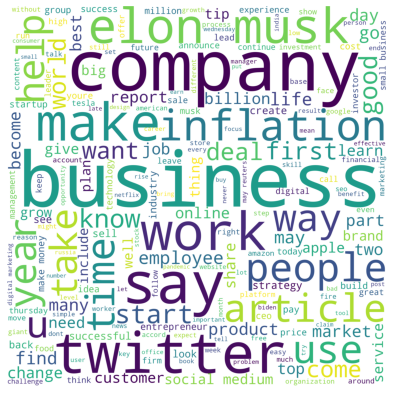

science:
Number of words: 29714


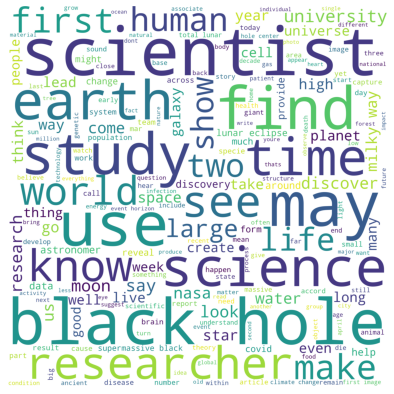

sports:
Number of words: 39954


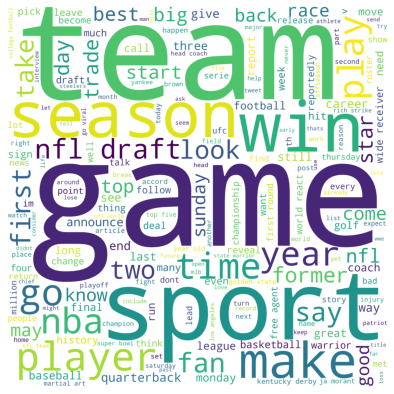

entertainment:
Number of words: 38838


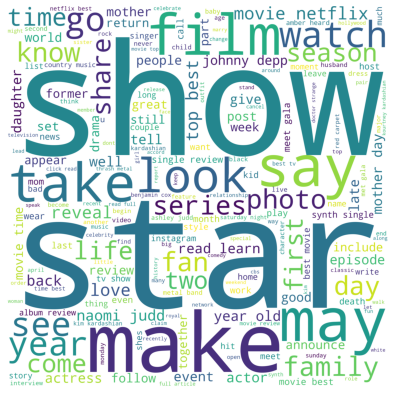

technology:
Number of words: 43464


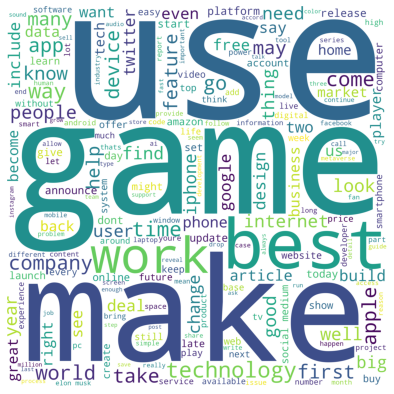

food:
Number of words: 17988


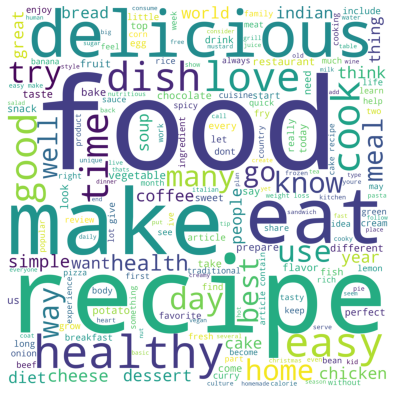

politics:
Number of words: 42696


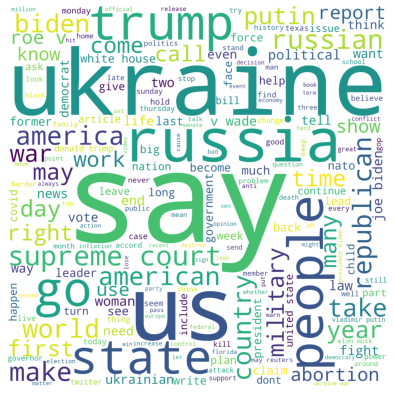

weather:
Number of words: 9099


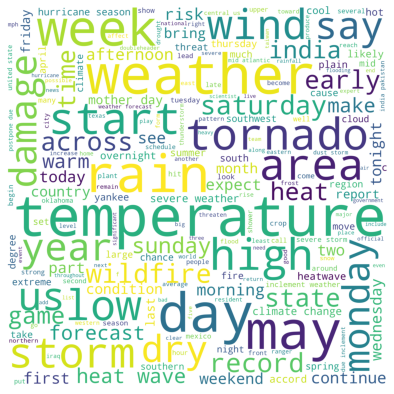

In [22]:
## Vizualization word cloud
category_series_words = {}

for category in set(df["category"]):
    category_words = df[df["category"] == category]["merged_text"]
    category_series_words[category] = category_words

for category, series_words in category_series_words.items():
    print(f"{category}:")
    wordcloud_draw(series_words, 'white')

### Full Dataframe Result

In [23]:
pd.set_option('display.max_rows', None)
df

category                                        merged_text
0           business  ceo company executive focus employee experienc...
1           business  differently love take amount stress see succes...
2           business  transition qa engineer developer personal expe...
3           business  president indonesia get annoyed cook oil crude...
4           business  magento problem owner online shop face overcom...
5           business  leadership emotional intelligence leadership e...
6           business  conservative twitter account gain follower mus...
7           business  reason workplace challenge manipulation recomm...
8           business  way increase freelance client deal get know fr...
9           business  earn month tiktok first year college app call ...
10          business  result orient work bomb shelter air raid ukrai...
12          business  ratan tata encourages support startup company ...
14          business  effectiveness search engine search remote busi...
15          business  erp full form sapaccounting ultimate guide erp...
16          business  learn skill earn online future person need lea...
17          business  business service business service backbone bus...
18          business  succeed people value work think anyone like mi...
19          business  ceo full form tell harsh reality ceo ceo organ...
20          business  teach english online flexible fun way make ext...
22          business  bop full form bop crisis ruin countrys economy...
23          business  apple history story steve job garage trillion ...
25          business  sop full form secret sop expert dont want know...
26          business  employee engagement program work engage employ...
27          business  amazon driver appreciate complimentary snack d...
28          business  get thing personal life know phrase multi task...
29          business  beyond business self development literature he...
30          business  use business concept improve life core purpose...
31          business  bpo full form top secret bpo blow mind full fo...
32          business  best financial tip young adult learn self cont...
33          business  become expert something make name expert indus...
35          business  imp full form full form meaning imp banking im...
36          business  key marketing channel business market business...
38          business  affiliate marketing platform various vertical ...
39          business  atm full form full form meaning atm banking ba...
40          business  get nervous job interview psychologically chan...
41          business  get first customer start along family friend r...
43          business  way ensure unique make unique numerous charact...
44          business  use hobby make money many us hobby apart chat ...
45          business  transition normal job work home job transit no...
46          business  rtgs full form rtgs make business easier trans...
47          business  saas startup fail saas company organization ut...
48          business  learner guide affiliate marketing learn make m...
50          business  four reason diy website development really bad...
51          business  forward think approach forex essential charact...
52          business  event majorly influence shape generation gener...
53          business  grand launch specscart store urmston read gran...
55          business  measure success digital marketing measure succ...
56          business  leave walt disney company leave walt disney co...
57          business  importance money management business final wor...
58          business  wdv full form meaning slm full form meaning wd...
59          business  incentive motivation example incentive motivat...
60          business  convenience store accounting software convenie...
61          business  amazon change kdp policy amazon recently annou...
62          business  inspire journey find ever know want grow still...
63          business  short term xauusd techincal an

In [27]:
df.to_csv('clean_csv.csv')